In [212]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [214]:
lead=pd.read_csv('/content/Leads_TimeSeries_Oye!.csv',date_parser=dateparse)

In [215]:
lead

,date,lead_source,count
0,2020-06-01,CBOB,1
1,2020-06-01,Driver App installation,16
2,2020-06-01,Driver Referral,29
3,2020-06-01,Operator app,12
4,2020-06-02,Driver App installation,26
...,...,...,...
1301,2021-04-30,Driver App installation,5
1302,2021-04-30,Driver Referral,1
1303,2021-05-01,Driver App installation,11
1304,2021-05-01,Driver Referral,3


In [216]:
lead.drop('lead_source',axis=1,inplace=True)

In [217]:
lead.describe()

,count
count,1306.000000
mean,19.406585
std,23.359839
min,1.000000
25%,5.000000
50%,13.000000
75%,27.000000
max,360.000000


In [218]:
lead=lead.groupby('date').sum()['count'].reset_index()


In [219]:
lead.head(20)

,date,count
0,2020-06-01,58
1,2020-06-02,57
2,2020-06-03,66
3,2020-06-04,69
4,2020-06-05,67
5,2020-06-06,87
6,2020-06-07,39
7,2020-06-08,78
8,2020-06-09,57
9,2020-06-10,57


In [220]:
lead.tail(20)

,date,count
315,2021-04-12,32
316,2021-04-13,37
317,2021-04-14,37
318,2021-04-15,71
319,2021-04-16,13
320,2021-04-17,12
321,2021-04-18,16
322,2021-04-19,45
323,2021-04-20,30
324,2021-04-21,56


In [221]:
lead.describe()

,count
count,335.000000
mean,75.656716
std,51.486628
min,2.000000
25%,41.500000
50%,63.000000
75%,94.000000
max,396.000000


In [222]:
lead.to_csv('LeadData.csv')

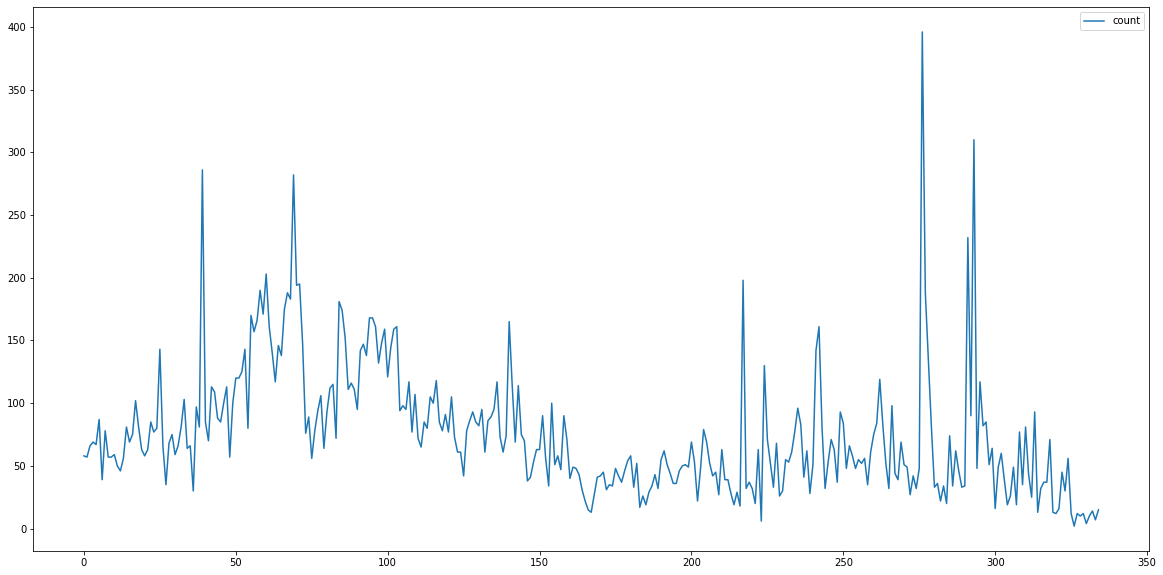

In [223]:
lead.plot(figsize=(20,10))

In [224]:
lead['date']=pd.to_datetime(lead['date'])

In [225]:
lead.set_index('date',inplace=True)

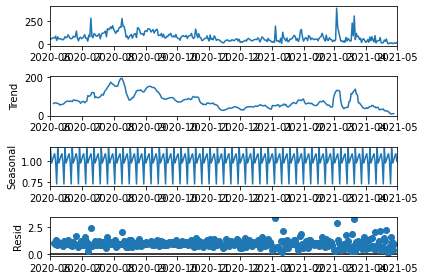

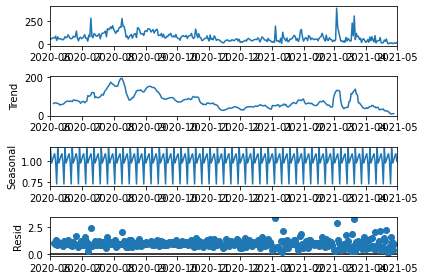

In [226]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(lead, model='multiplicative')
result.plot()

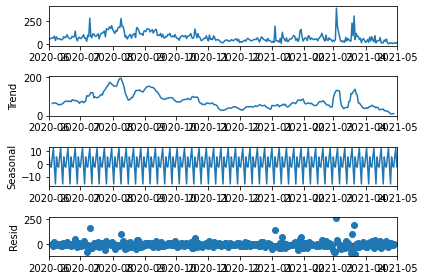

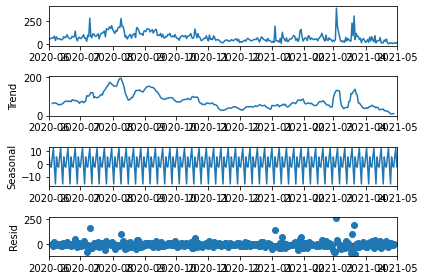

In [227]:
result = seasonal_decompose(lead, model='additive')
result.plot()

In [228]:
from statsmodels.tsa.stattools import adfuller

In [229]:
res=adfuller(lead['count'])

In [230]:
def adfuller_test(count):
  result=adfuller(count)
  labels=['ADF Test Statistic','p value','Number of Lags Used','Number of Observations used']
  for i,label in zip(result,labels):
    print(label+':'+str(i))

     
  if result[1]<=0.05:
     print("Reject Null Hypothesis")
  else:
    print("Accept Null Hypothesis")

In [231]:
adfuller_test(lead['count'])

ADF Test Statistic:-1.2304365029599722
p value:0.6603676068397941
Number of Lags Used:17
Number of Observations used:317
Accept Null Hypothesis


In [232]:
lead['Lead Count']=lead['count']-lead['count'].shift(1)

In [233]:
lead

,count,Lead Count
date,,
2020-06-01,58,NaN
2020-06-02,57,-1.0
2020-06-03,66,9.0
2020-06-04,69,3.0
2020-06-05,67,-2.0
...,...,...
2021-04-27,4,-8.0
2021-04-28,10,6.0
2021-04-29,14,4.0


In [234]:
lead['count'].values

array([ 58,  57,  66,  69,  67,  87,  39,  78,  57,  57,  59,  50,  46,
        56,  81,  69,  75, 102,  81,  63,  58,  63,  85,  77,  80, 143,
        66,  35,  68,  75,  59,  66,  81, 103,  64,  66,  30,  97,  81,
       286,  85,  70, 113, 109,  88,  85, 100, 113,  57, 100, 120, 120,
       125, 143,  80, 170, 157, 166, 190, 171, 203, 161, 140, 117, 146,
       138, 175, 188, 183, 282, 194, 195, 147,  76,  89,  56,  78,  94,
       106,  64,  93, 112, 115,  72, 181, 174, 152, 111, 116, 111,  95,
       142, 147, 138, 168, 168, 161, 132, 148, 159, 121, 144, 159, 161,
        94,  98,  95, 117,  77, 107,  72,  65,  85,  80, 105, 100, 118,
        85,  78,  91,  77, 105,  73,  61,  61,  42,  78,  86,  93,  85,
        82,  95,  61,  86,  89,  95, 117,  73,  61,  74, 165, 114,  69,
       114,  75,  70,  38,  41,  53,  63,  63,  90,  56,  34, 100,  51,
        58,  47,  90,  71,  40,  49,  48,  43,  31,  22,  15,  13,  27,
        41,  42,  45,  31,  35,  34,  48,  42,  37,  46,  54,  5

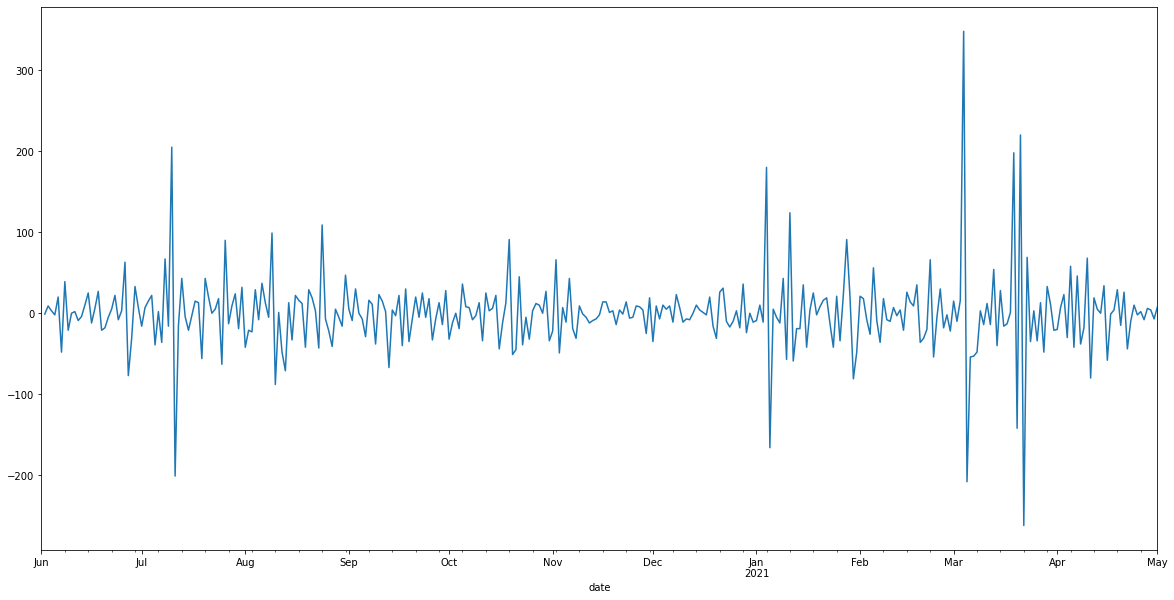

In [235]:
lead['Lead Count'].plot(figsize=(20,10))

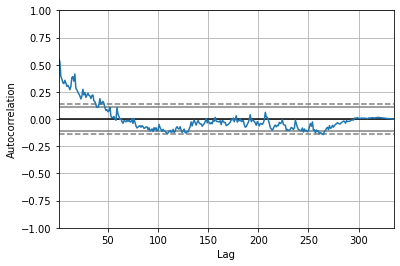

In [236]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(lead['count'])

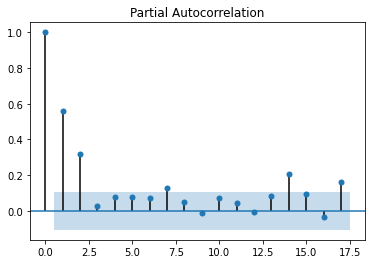

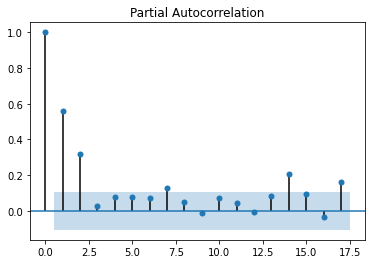

In [237]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lead['count'],lags=17)

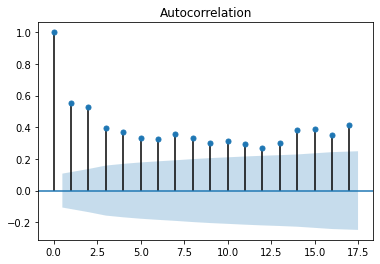

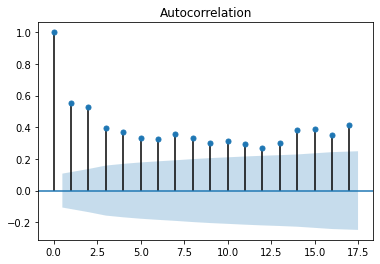

In [238]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(lead['count'],lags=17)

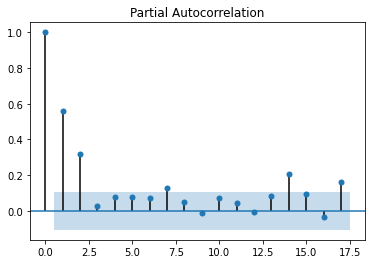

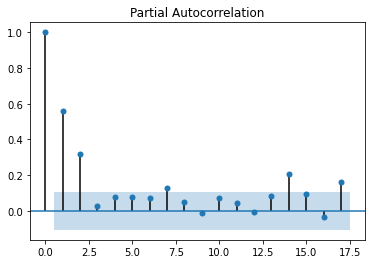

In [239]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(lead['count'],lags=17)

In [240]:
from statsmodels.tsa.arima_model import ARIMA

In [241]:
model=ARIMA(lead['count'],order=(2,1,2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # - Attemtping to index with a type that cannot be cast to integer
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  # - Attemtping to index with a type that cannot be cast to integer


In [242]:
model_fit=model.fit()

In [243]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.count   No. Observations:                  334
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1703.036
Method:                       css-mle   S.D. of innovations             39.577
Date:                Sun, 06 Jun 2021   AIC                           3418.071
Time:                        10:57:48   BIC                           3440.938
Sample:                    06-02-2020   HQIC                          3427.189
                         - 05-01-2021                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1382      0.299     -0.462      0.644      -0.724       0.448
ar.L1.D.count    -0.0358      0.223     -0.160      0.873      -0.474       0.402
ar.L2.D.count     0.2644      0.073      3.627      0.000       0.122       0.407
ma.L1.D.count    -0.6407      0.227     -2.819      0.005      -1.086      -0.195
ma.L2.D.count    -0.2562      0.201     -1.272      0.204      -0.651       0.139
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.8784           +0.0000j            1.8784            0.5000
AR.2            2.0137           +0.0000j            2.0137            0.0000
MA.1            1.0877           +0.0000j            1.0877            0.0000
MA.2           -3.5886           +0.0000j            3.5886            0.5000
-----------------------------------------------------------------------------
"""

In [244]:
future=pd.date_range(start='2021-05-01',end='2021-07-30')

In [245]:
p=model_fit.predict(start=len(lead) ,end=len(lead)+90,typ='levels')

In [246]:
p.index=future

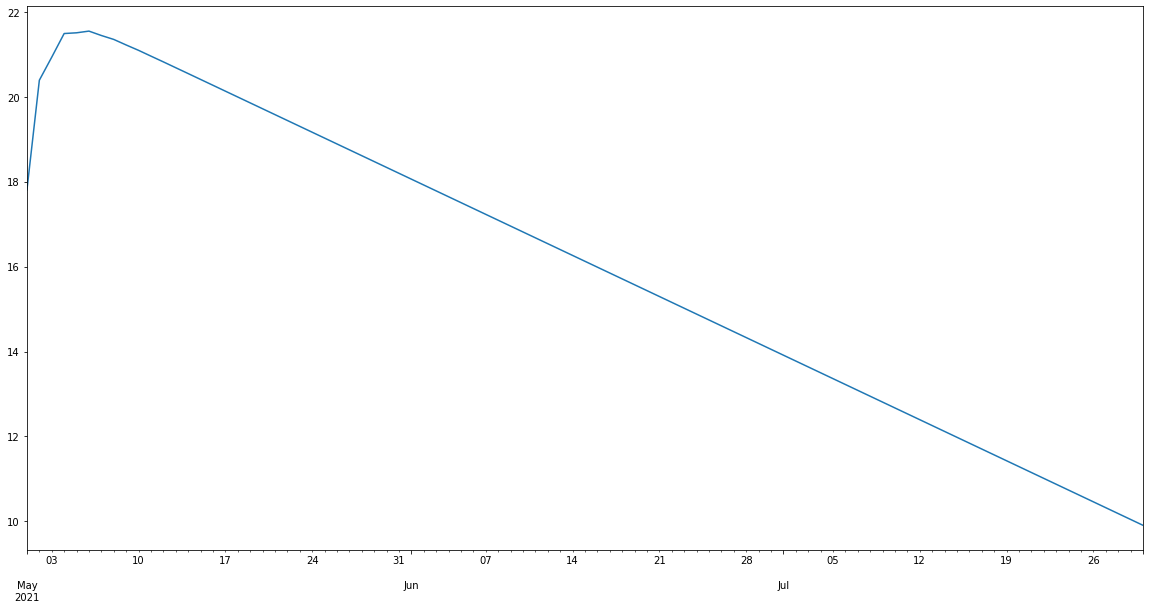

In [247]:
p.plot(figsize=(20,10))

In [248]:
p.values

array([17.80783959, 20.38862645, 20.93201003, 21.48827007, 21.50544246,
       21.54530859, 21.44184447, 21.3495085 , 21.21888223, 21.092568  ,
       20.9559767 , 20.82089311, 20.68303862, 20.54568187, 20.40757477,
       20.26962611, 20.13147341, 19.9933699 , 19.85521068, 19.71706646,
       19.57890698, 19.44075201, 19.30259284, 19.16443502, 19.02627604,
       18.88811745, 18.74995855, 18.61179976, 18.47364088, 18.33548204,
       18.19732317, 18.05916431, 17.92100544, 17.78284658, 17.64468771,
       17.50652885, 17.36836999, 17.23021112, 17.09205226, 16.95389339,
       16.81573453, 16.67757566, 16.5394168 , 16.40125794, 16.26309907,
       16.12494021, 15.98678134, 15.84862248, 15.71046361, 15.57230475,
       15.43414588, 15.29598702, 15.15782816, 15.01966929, 14.88151043,
       14.74335156, 14.6051927 , 14.46703383, 14.32887497, 14.19071611,
       14.05255724, 13.91439838, 13.77623951, 13.63808065, 13.49992178,
       13.36176292, 13.22360405, 13.08544519, 12.94728633, 12.80